# An example of using a hyperbolic tangent

## Creating a dataset

In [1]:
import numpy as np
import pandas as pd

# Generation of random temperature data
np.random.seed(0)
dates = pd.date_range('2023-01-01', periods=365, freq='D')
temperature = 10 + 10 * np.sin(np.linspace(0, 2 * np.pi, 365)) + np.random.normal(0, 1, 365)

# Creating a DataFrame
data = pd.DataFrame({'Date': dates, 'Temperature': temperature})

# Saving data to a file
data.to_csv('temperature_data.csv', index=False)


## Import and preparation of data in the program

            Temperature
Date                   
2023-01-01    11.764052
2023-01-02    10.572764
2023-01-03    11.323899
2023-01-04    12.758507
2023-01-05    12.557469
Epoch 1/10
9/9 [==============================] - 2s 5ms/step - loss: 0.2944
Epoch 2/10
9/9 [==============================] - 0s 4ms/step - loss: 0.1049
Epoch 3/10
9/9 [==============================] - 0s 5ms/step - loss: 0.0170
Epoch 4/10
9/9 [==============================] - 0s 5ms/step - loss: 0.0181
Epoch 5/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0096
Epoch 6/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0080
Epoch 7/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0065
Epoch 8/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0053
Epoch 9/10
9/9 [==============================] - 0s 5ms/step - loss: 0.0046
Epoch 10/10
3/3 [==============================] - 0s 5ms/step
[[2.136335 ]
 [2.0061915]
 [2.0058696]
 [2.08639  ]
 [2.174067 ]]


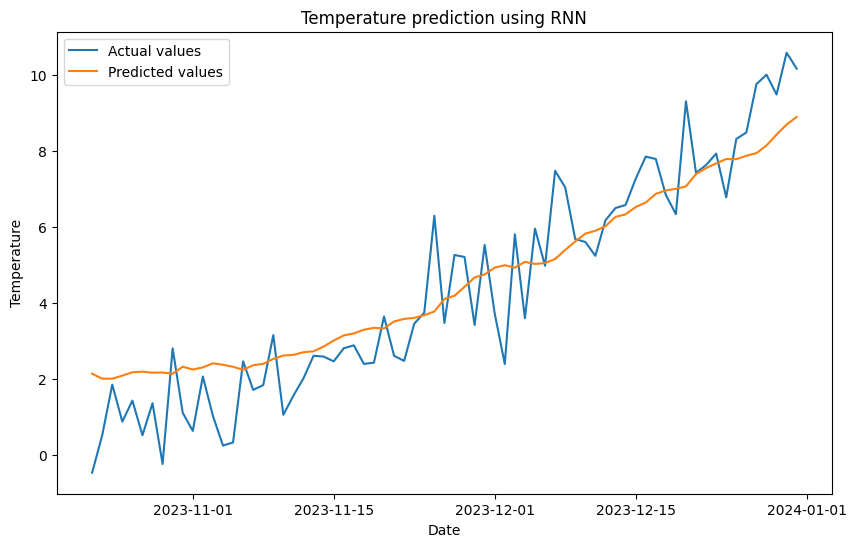

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Data import
data = pd.read_csv('temperature_data.csv', parse_dates=['Date'], index_col='Date')

# Data verification
print(data.head())

# Data scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Temperature'].values.reshape(-1, 1))

# Preparation of sequences for training
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 10
X, y = create_dataset(scaled_data, time_step)

# Data conversion to the form [samples, time_steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Separation of data into training and test samples
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# Creating a model
model = Sequential()
model.add(LSTM(32, activation='tanh', input_shape=(time_step, 1)))
model.add(Dense(1))

# Compilation of the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Model training
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Prognostication
predictions = model.predict(X_test)

# Inverse scaling of forecasts
predictions = scaler.inverse_transform(predictions)

# Checking the first few predictions
print(predictions[:5])

# Visualization of results
plt.figure(figsize=(10,6))
train_size_with_shift = train_size + time_step + 1
plt.plot(data.index[train_size_with_shift:train_size_with_shift+len(y_test)], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual values')
plt.plot(data.index[train_size_with_shift:train_size_with_shift+len(predictions)], predictions, label='Predicted values')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature prediction using RNN')
plt.legend()
plt.show()

**Sources**
1.  Building an RNN prediction: https://chatgpt.com/share/1938788e-e46f-4656-9ef0-37719b39132a
2.  Robotdreams: https://robotdreams.cc/uk/blog/327-funkciji-aktivaciji-stupinchasta-liniyna-sigmojida-relu-ta-tanh

